Notebook 2, Module 2, Statistical Inference for Data Science, CAS Applied Data Science, 2019-08-27, G. Conti, S. Haug, University of Bern. 


# 2. Probability and descriptive statistics


**Average expected study time :** 3x45 min (depending on your background). Your are supposed to play with the examples: change them, maybe test on another dataset. From just executing them, you will not learn much.

**Learning outcomes :**
- Know difference between frequentist and Bayesian interpretation of probability
- Random variables and probability density functions
  - Know the normal probability density function (p.d.f.) by heart
- Describing data with descriptive statistics
  - Obtain moments of a p.d.f. (mean, variance, standard deviation, kurtosis, skewness, quantile, median, mode)
  - Plot a p.d.f and its moments
  - Generate data randomly according to a p.d.f.
- Know the existence of some other important p.d.f.
- Understand the meaning of gaussian/normal uncertainties

#### Literature

Introduction slides : 
- https://docs.google.com/presentation/d/1JOlZHsnICU5cziUoziLwcog51Jt16XnNZ9WVQJJVink/edit#slide=id.g3f94386453_0_671

- An introduction: http://www.wormbook.org/chapters/www_statisticalanalysis/statisticalanalysis.pdf
- Python: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
- R: https://www.rdocumentation.org/packages/base/versions/3.4.3/topics/data.frame
- Introduction to statistical data analysis for the life sciences, Claus Thorn Ekstrøm, Helle Sørensen
- Statistics for the life sciences, Myra L. Samuels et al.

For mathematicians or very interested people
- A. Stuart, J.K. Ord, and S. Arnold, Kendall’s Advanced Theory of Statistics

### Exercise 2.0  (10 sec)

In [1]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
print('Congrats, you just loaded numpy, scipy.stats and mathplot.pyplot loaded !')

Congrats, you just loaded numpy, scipy.stats and mathplot.pyplot loaded !


## 2.1 Random variables and probability density functions (p.d.f.)



In practice the measurement process, the data taking, is a random, or stochastic, process. The outcome varies from measurement to measurement. There are three (at least) reasons:

- Measurements are normally on a sample, not the full population. Samples fluctuate.
- Sensors have limited resolution, measurements on the same sample vary within the resolution 
- According to quantum mechanics, i.e. at smallest distances, measurements are by nature stochastic

Our Iris dataset is a sample from 50 flowers in each class. So in each class there are 50 varying measurements for each of the four observables, sepal and petal length and width. This is due to the first and maybe the second reason (quantum mechanics can be neclected at scales larger than molecules). In descriptive statistics the observables are therefore called **random** variables. Let us call one x for examplification.

If x can take on any value from a continuous range, we write $f(x;\theta)dx$ as the probability that the measurement’s outcome lies between x and $x + dx$. The function $f (x; \theta)$ is called the **probability density function (p.d.f.)**, which may depend on one or more parameters $\theta$ (for example the Iris class).

A random variable can be discrete or continuous. If discrete, then we use $f(x;\theta)$ to denote the probability to find the value x (in python the term probability mass fundtion, pmf, is then used). In the following the term p.d.f. is often taken to cover both the continuous and discrete cases, although technically the term density should only be used in the continuous case.

The p.d.f. is always normalized to **unity** (the number 1), i.e. the integral or the surface under the curve equals one. Both x and $\theta$ may have multiple components and are then often written as vectors. If $\theta$ is unknown, we may wish to estimate its value from a given set of measurements of x; this is a central topic of statistics (see next notebook on parameter estimation and regression).

The p.d.f. should be chosen to describe the fluctuation of the random variable in a best possible way. In other words, we should always choose an approprate p.d.f to describe our data. Some very useful and much used p.d.f. follow. 

### The normal p.d.f.

The normal (or Gaussian) probability density function is probably the most used one (informally the "bell curve"). It 
derives its importance in large part from the *central limit theorem*: "In most situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed." https://en.wikipedia.org/wiki/Central_limit_theorem 

**Example:** If one flips a coin many times the probability of getting a given number of heads in a series of flips will approach a normal curve, with mean equal to half the total number of flips in each series. (In the limit of an infinite number of flips, it will equal a normal curve.)

This means that in many or most cases it is sufficient to know the characteristics of the normal p.d.f. Others can be looked up if needed. Also often unspecified statements like the *error*, or better, the *uncertainty* refer to their meaning on the normal p.d.f.

As a formula the normal distribution function looks like (in one dimension)

$$ f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp(\frac{-(x-\mu)^2}{2\sigma^2}) $$

It reads, given the distribution parameters mean $\mu$ and variance $\sigma$, x follows this function.

### Exercise 2.1 (5 min)

Plot the normal distribution with mean 0 and variance 5 for 400 x values between -20 to 20. Repeat this for two other means and variances. How big is the surface under the curves ?

(See also scipy.stat.norm https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html)  


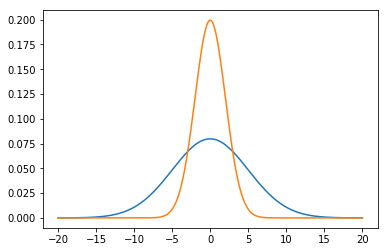

In [2]:
# Part of the solution:
x = np.linspace(-20,20,400) # 400 bins from -20 to 20
plt.plot(x, scipy.stats.norm.pdf(x,0,5))
plt.plot(x, scipy.stats.norm.pdf(x,0,2))

## 2.2 Some words on probability and bayesian versus frequentist statistics

Since data taking is data taking of random variables, we need to define and talk about probability. In mathematichs probability is defined in a rather abstract manner (see Annex below). For our purposes we go directly to the interpreation as either **relative frequency** or **subjective probability**. If A is a possible outcome of an experiment repeated n times, then the probability of A is the realtive frequency

$$P(A) = \lim_{n\rightarrow \infty} \frac{times \; outcome \;is\;A}{n}$$

The subjective probability is

$$ P(A) = degree\;of\;belief\;that \;A \; is\; true$$

Both concepts are consistent with the abstract mathematical definition .

#### Bayes' theorem

From this definition and using the fact that $A ∩ B$ and $B ∩ A$ (intersection) are the same, one obtains
Bayes’ theorem

$$P (A|B) = \frac{P(B|A)P(A)}{P(B)}$$

first published by the Reverend Thomas Bayes (1702-1761). Statistics based on the relative frequency interpretation of probability is called frequentist statistics, on bayesian theorem bayesian statistics.

## 2.3 Describing the data with descriptive statistics

Statistics is a branch of mathematics dealing with the collection, analysis, interpretation, presentation, and organization of data. Two main statistical methods are used in data analysis: descriptive statistics, which summarize data from a sample using indexes such as the mean or standard deviation (see moments), and inferential statistics, which draw conclusions from data that are subject to random variation (e.g. observational errors, sampling variation).


### 2.3.1 Moments of the p.d.f. (mean, variance and standard deviation)

The $n^{th}$ moment of a random variable x with p.d.f. $f_(x)$ is
$$ \alpha_n \equiv E[x^n] = \int_{-\infty}^{\infty} x^nf(x)dx   $$
In the discrete case this integral becomes the sum known as the arithemtic mean:
$$ \mu = \frac{1}{n} \sum_{i=1}^n x_i$$

<!--
and the $n^{th}$ central moment of x (or moment about the mean, $α_1$) is

$$ m_n \equiv E[(x-\alpha_1)^n] = \int_{-\infty}^{\infty} (x-\alpha_1)^nf(x)dx   $$
-->

The most commonly used moments are the **mean $\mu$ (or expectation value) and variance $\sigma^2$**:

$$\mu \equiv \alpha_1 $$
$$\sigma^2 \equiv V[x] \equiv \int_{-\infty}^{\infty} (x-\mu)^2 f(x)dx = ... = \alpha_2 - \mu^2 $$

The mean is the location of the “center of mass” of the p.d.f., and the variance is a measure of the square of its width. It is often convenient to use the **standard deviation (SD)** of $x$, $\sigma$, defined as the square root of the variance. In the discrete case the variance becomes
$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$$

For the normal p.d.f the standard deviation is its width. 

Based on higher moments other distribution descriptors are formed. Skewness and kurtosis you may encounter. The skewness is a number indicating the deviation from a symmetric form. Kurtosis is a number indicating if the tails of the distribution is larger or smaller then the tails of the normal distribution.


### 2.3.2 Quantiles and median

The **quantile $x_{\alpha}$** is the value of the random variable x at which $\alpha$% of the area is below x. An important special case is the **median, $x_{med} \equiv x_{50}$**. At the median half the area lies above and half lies below. 
For the normal p.d.f. the median equals the mean. The most probable value of a distribution is called **mode**. 

Special quantiles are the quartiles and percentiles. The first quartile is the $x_{25}$, the second the $x_{50}$ etc. Percentiles are for example $x_{13}$ etc. 

<!--
Any odd moment about the mean is a measure of the **skewness** of the p.d.f. The simplest of these is the dimensionless coefficient of skewness $\gamma_1 = m_33/\sigma^3$.

The fourth central moment $m_4$ provides a convenient measure of the tails of a distribution. For the Gaussian distribution, one has $m_4 = 3\sigma^4$. The **kurtosis** is defined as $\gamma_2 = m_4/\sigma^4 − 3$, i.e., it is zero for a Gaussian, positive for a leptokurtic distribution with longer tails, and negative for a platykurtic distribution with tails that die off more quickly than those of a Gaussian.

The **quantile $x_{\alpha}$** is the value of the random variable x at which the cumulative distribution is equal to $\alpha$. That is, the quantile is the inverse of the cumulative distribution function, i.e., $x_{alpha} = F^{−1}(\alpha)$. An important special case is the **median, $x_{med}$**, defined by $F(x_{med}) = 1/2$, i.e., half the probability lies above and half lies below $x_{med}$. (More rigorously, $x_{med}$ is a median if $P(x \geq x_{med}) \geq 1/2$ and $P(x \leq x_{med}) \geq 1/2$. If only one value exists, it is called ‘the median.’)

Under a monotonic change of variable $x \rightarrow y(x)$, the quantiles of a distribution (and hence also the median) obey $y_{\alpha} = y(x_{\alpha})$. In general the expectation value and **mode** (most probable value) of a distribution do not, however, transform in this way.

Let us look at median and quantile$_68$ of the normal pdf: 
-->

### Exercise 2.3.2 (15 min)

Get some desciptive statistics from a normal (continous) p.d.f. with mean 0 and SD 4.

In [1]:
mean, variance, skewness, kurtosis = scipy.stats.norm.stats(0,4,moments='mvsk')
print(mean, variance, skewness, kurtosis)

NameError: name 'scipy' is not defined

Plot the p.d.f and some moments

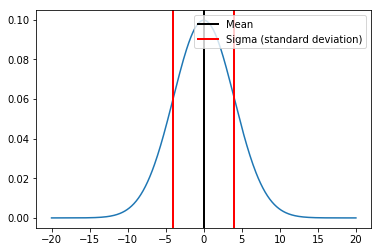

In [4]:
x = np.linspace(-20,20,400)
sigma=variance**0.5
plt.plot(x,scipy.stats.norm.pdf(x,mean,sigma))
plt.axvline(x=mean, linewidth=2, color = 'k',label="Mean") # Plot the mean as a vertical line
plt.axvline(x=mean-sigma, linewidth=2, color = 'r', label="Sigma (standard deviation)")
plt.axvline(x=mean+sigma, linewidth=2, color = 'r')
plt.legend(loc='upper right')

Do the same with the discrete and skew poisson p.m.f. See also https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [5]:
m, v, s, k = scipy.stats.poisson.stats(1.7,moments='mvsk')
#my_norm = norm(0,2)
print('Mean = %1.2f Var = %1.2f Std = %1.2f Skewness = %1.2f kurtosis = %1.2f' % (m,v,v**0.5,s,k))
#my_norm.moments()

Mean = 1.70 Var = 1.70 Std = 1.30 Skewness = 0.77 kurtosis = 0.59


Plot mode and median of a poisson p.d.f. 

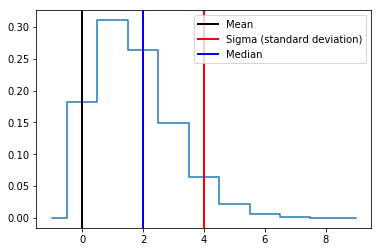

In [6]:
dist = scipy.stats.poisson(1.7)
x = np.arange(-1, 10)
sigma=variance**0.5
plt.plot(x,dist.pmf(x),linestyle='steps-mid')
dist.median()
plt.axvline(x=mean, linewidth=2, color = 'k',label="Mean")
plt.axvline(x=mean+sigma, linewidth=2, color = 'r', label="Sigma (standard deviation)")
plt.axvline(x=dist.median(), linewidth=2, color = 'b',label="Median")
plt.legend(loc='upper right')

**Some words on the Poisson distribution**

The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space. For example:

- The number of meteorites greater than 1 meter diameter that strike Earth in a year
- The number of patients arriving in an emergency room between 10 and 11 pm

The probability mass function is $$f(k;\lambda) = \frac{\lambda^k exp(-\lambda)}{k!}$$
For large k the normal distribution is an excellent approximation of the poisson p.d.f. For k below 20 one should be careful using statements based on the normal distribution, e.g. the standard deviation is not symmetric anymore.

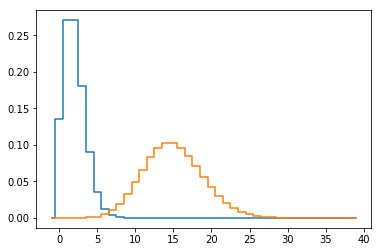

In [7]:
x = np.arange(-1, 40)
plt.plot(x,scipy.stats.poisson.pmf(x,2),linestyle='steps-mid')
plt.plot(x,scipy.stats.poisson.pmf(x,15),linestyle='steps-mid')


We see that a possion p.d.f. with mean 15 looks very much like the normal distribution.

### Some words on the binomial distribution 

$$f(k;n,p) = \binom{n}{k} \cdot p^kq^{n-k}$$

The binomial distribution converges towards the Poisson distribution as the number of trials goes to infinity while the product np remains fixed or at least p tends to zero. Therefore, the Poisson distribution with parameter λ = np can be used as an approximation to B(n, p) of the binomial distribution if n is sufficiently large and p is sufficiently small. According to two rules of thumb, this approximation is good if n ≥ 20 and p ≤ 0.05, or if n ≥ 100 and np ≤ 10.

For n>20 and p not too close to 1 or 0, the normal distribution is also here a good approximation. 

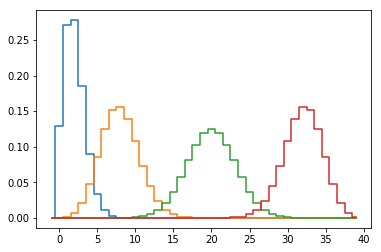

In [8]:
x = np.arange(-1, 40)
plt.plot(x,scipy.stats.binom.pmf(x,40,0.05),linestyle='steps-mid')
plt.plot(x,scipy.stats.binom.pmf(x,40,0.2),linestyle='steps-mid')
plt.plot(x,scipy.stats.binom.pmf(x,40,0.5),linestyle='steps-mid')
plt.plot(x,scipy.stats.binom.pmf(x,40,0.8),linestyle='steps-mid')

Get yourself a cup of something and think about these questions.

- Why are measured observables random variables.
- Which probability distribution of a random variable is the most important?
- Thumb of rule, when is the normal distribution a good approximation?
- Can you mention 5 descriptive statistical measures (mostly based on the moments of the p.d.f)?


### Exercise 2.3.3

Let us look at the descriptive statistics of the Iris Setosa data.

In [10]:
import pandas as pd
dataframe = pd.read_csv('iris.csv',names=['slength','swidth','plength','pwidth','name'])
dataframe.head()

,slength,swidth,plength,pwidth,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df_setosa = dataframe[dataframe['name']=='Iris-setosa']
df_setosa.mean()



slength    5.006
swidth     3.418
plength    1.464
pwidth     0.244
dtype: float64

In [12]:
df_setosa.median()

slength    5.0
swidth     3.4
plength    1.5
pwidth     0.2
dtype: float64

In [13]:
df_setosa.describe() # Or get a summary

,slength,swidth,plength,pwidth
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


All the descriptive statistics methods for python dataframes are listed here:
https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

Now we looked at the numbers. Let's us plot the distributions.

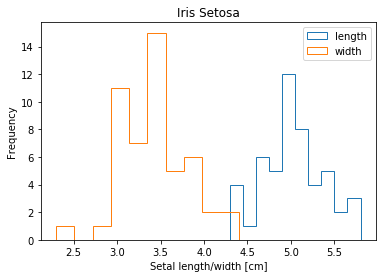

In [14]:
df_setosa['slength'].plot(kind="hist",fill=False,histtype='step',title='Iris Setosa', label="length")
ax = df_setosa['swidth'].plot(kind="hist",fill=False,histtype='step', label="width")
ax.set_xlabel('Setal length/width [cm]')
ax.set_ylabel('Frequency')
plt.legend()

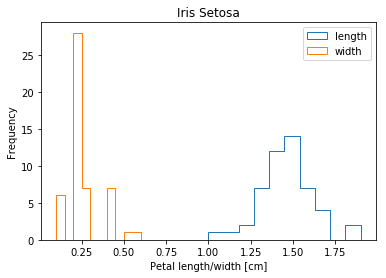

In [15]:
df_setosa['plength'].plot(kind="hist",fill=False,histtype='step',title='Iris Setosa', label="length")
ax = df_setosa['pwidth'].plot(kind="hist",fill=False,histtype='step', label="width")
ax.set_xlabel('Petal length/width [cm]')
ax.set_ylabel('Frequency')
plt.legend()

It is hard to say by eye if the distributions are normally distributed. Later this week, we'll use statistical tests to find that out. The binning is also not equal. To define equal binnings see example from yesterday. The petal length is funny.

We can complete our descriptive studies by looking at the scatter plots (correlations). 


## Exercise 2.3.4

It is important to obtain some routine with the computation of probabilities and quantiles. 

Let X be binomially distributed with n = 60 and p = 0.4. Compute the following.
- P(X = 24) (PMF), P(X ≤ 24) (CDF)
- Compute the mean and standard deviation of X.

In [1]:
#write your code here


## 2.4 How to generate random variates

One can simulate data sets by generating them from probability density functions. The computer does this with a so called Monte Carlo (MC) algorithm. It draws x values (pseudo) randomly from the given distribution. The the actual draws of the random variable are called random variates. Simulations can be very useful when planning an experiment and developing the analysis method. Instead of real data one can use the simulated data. 

Let us simulate the Iris setosa sepal width data (width the mean and standard deviation we got from the real data).

In [17]:
n = scipy.stats.norm.rvs(3.418,0.318,50) # 100 random values from a normal distribution with mean 3.418 and SD 0.318

In [18]:
print(n[0:10]) # Print first 10 

[3.37723573 3.47758363 3.47814179 3.74119559 3.26967818 3.63726807
 3.0471479  3.48869453 2.94403379 3.47668367]


In [19]:
# Put the simulated data into a dataframe
import pandas as pd
df_setosa_sim = pd.DataFrame(n)
df_setosa_sim.head()

,0
0,3.377236
1,3.477584
2,3.478142
3,3.741196
4,3.269678


## 2.5 Other probability density functions (5 min)

This is just for your reference, no need to understand all these distributions. A quite good free and comprehensive book is here: http://staff.fysik.su.se/~walck/suf9601.pdf. 

**Table 1.4.1** Some common probability density functions, with corresponding characteristic functions and means and variances. In the Table, $\Gamma(k)$ is the gamma function, equal to $(k − 1)!$ when $k$ is an integer; $_1F_1$ is the confluent hypergeometric function of the 1st kind [11].

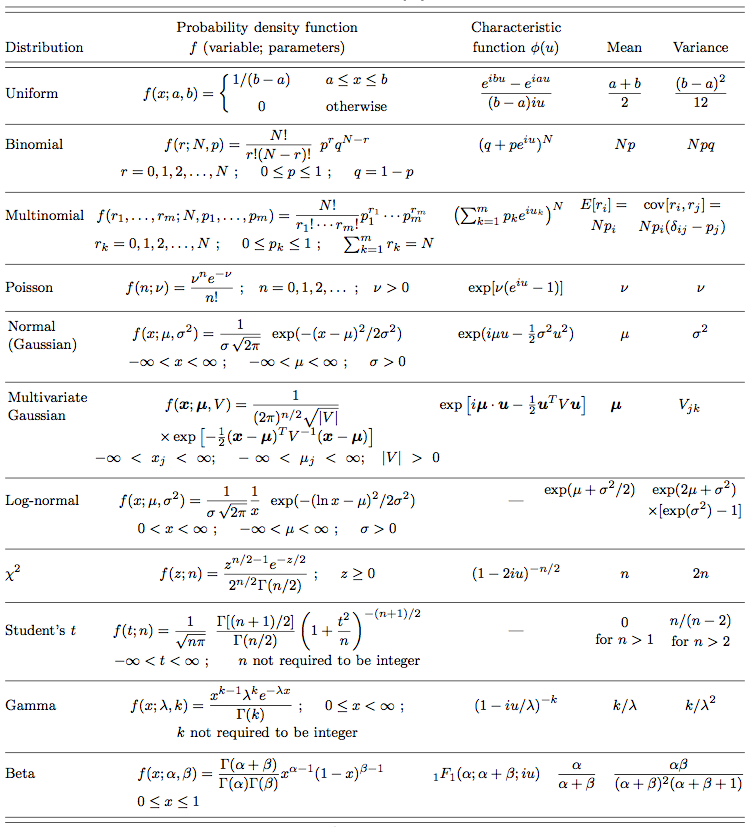

Distributions are either discrete or continuous. To study the distributions we use the statistical functions of scipy.stats (https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html). There you also find more distributions than listed here.

## 2.6 Uncertainties (important)

All data have uncertainties. These should always be communicated when showing scientific numbers or plots. We distinguish between two types.

- Statistical uncertainties 
    - Fluctuations, can be made smaller by taking more data, i.e. get more statistics
- Systematic uncertainties 
    - Shift of data in one direction due to some "mistake" in the measurement, e.g. wrongly calibrated instrument showing all measured values systematically higher as they really are. Or for instance uncertainty due to the choice of methods and tools
    
The statistics tools can mostly handle the statistical uncertainties. There is no mathematical recipe for dealing with systematical uncertainties. You have to think through your experiment and try to estimate the influence of everything that can go wrong.

When uncertainties are stated on numbers or in graphs as error bars or error bands they generally show one standard deviation. If the data are well described by a normal p.d.f, the interpretation of one standard deviation is clear: if the measurement is repeated many times, 32% (or about 1/3 of the measurements) **should** be outside the error bars. 

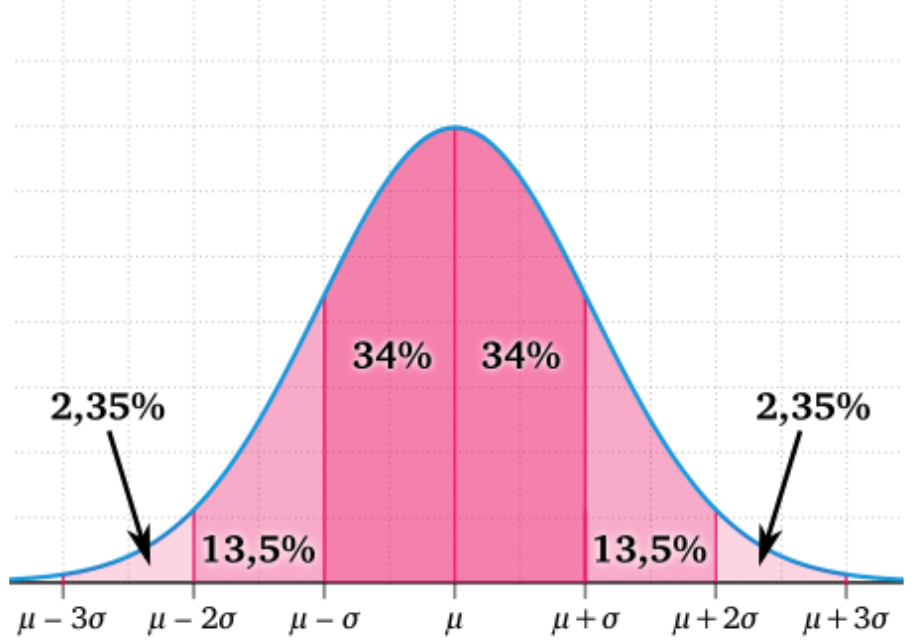

If the p.d.f is not normal, the interpretation of one standard deviation is not clear. For example, for a poisson p.d.f. it is not symmetric. So again we see, for low counts where the normal asumption is not a good approximation, let's say below 20, the interpretation is not obvious anymore and care is needed.

Very nice is the fact that the standard deviation of a poisson distribution is $\sqrt{\mu}$. So if you have a count that is larger than around 20 (then the normal interpretation is a good approximation), you get the standard deviation by taking the square root of the count. 

The following code may be difficult to understand, ask on the chat or tomorrow.

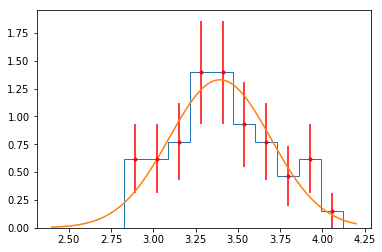

In [20]:
# Draw a histogram which is not normalised
entries1, edges, patches = plt.hist(n, bins=10, histtype='step')
# Close plt so that this histogram is not shown
plt.close() 
# Draw a histogram which IS normed
entries2, edges, patches = plt.hist(n, bins=10, histtype='step',density=True)
# Calculate the poisson standard deviation and scale down to second histogram
errors = np.sqrt(entries1) * entries2/entries1
# calculate bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])
# draw errobars, use the sqrt error.
plt.errorbar(bin_centers, entries2, yerr=errors, fmt='r.')
# Draw a normal distribution
x = np.linspace(2.4,4.2,100)
sigma=variance**0.5
plt.plot(x,scipy.stats.norm.pdf(x,df_setosa_sim.mean(),df_setosa_sim.std()))
plt.show()

We see that 3 out of 10 data points are more than one standard deviation off the "theory" curve. This is how it should be.

## 2.7 Submit 1 question (10 min)  - mandatory

Submit one question to this notebook for tomorrow's discussion session: Link on Ilias.


## References

1. H. Cramer, Mathematical Methods of Statistics, (Princeton Univ. Press, New Jersey, 1958).
2. A. Stuart and J.K. Ord, Kendall’s Advanced Theory of Statistics, Vol. 1 Distribution Theory 6th Ed., (Halsted Press, New York, 1994), and earlier editions by Kendall and Stuart.
3. R.J. Barlow, Statistics: A Guide to the Use of Statistical Methods in the Physical Sciences, (John Wiley, New York, 1989).
4. S. Brandt, Data Analysis, 3rd Ed., (Springer, New York, 1999).
5. G. Cowan, Statistical Data Analysis, (Oxford University Press, Oxford, 1998).
6. A.N. Kolmogorov, Grundbegriffe der Wahrscheinlichkeitsrechnung, (Springer, Berlin,
1933); Foundations of the Theory of Probability, 2nd Ed., (Chelsea, New York 1956).
7. Ch. Walck, Hand-book on Statistical Distributions for Experimentalists, University of Stockholm Internal Report SUF-PFY/96-01, available from http://staff.fysik.su.se/~walck/suf9601.pdf.
8. M. Abramowitz and I. Stegun, eds., Handbook of Mathematical Functions, (Dover, New York, 1972).

# Annex 1 Probability

An abstract definition of probability can be given by considering a set $S$, called the sample space, and possible subsets $A,B,...$ the interpretation of which is left open. The probability $P$ is a real-valued function defined by the following axioms due to Kolmogorov (1933) [9]:

- For every subset $A$ in $S$, $P(A) ≥ 0$;
- For disjoint subsets (i.e., $A ∩ B = ∅$), $P(A ∪ B) = P(A) + P(B)$; 
- $P(S)=1$.

From this further properties can be derives, e.g.

- $P(\bar{A}) = 1 - P(A)$
- $P(A \cup \bar{A}) = 1$
- $P(\emptyset) = 0$
- if A in B, then $P(A)\leq P(B)$
- $P(A \cup \bar{A}) = P(A) + P(B) - P(A\cap B)$

#### Conditional probability
In addition, one defines the conditional probability $P(A|B)$ (read as $P$ of $A$ given $B$) as $$P(A|B) = \frac{P(A ∩ B)}{P(B)}$$

As an example, when throwing the dice, consider obtaining more than 3 eyes given only trows with even number of eyes outcomes. We calculate the (conditional) probability:

$$P(n>3|n\; even) = \frac{P(n>3 \cap n\; even)}{P(even)} = \frac{2/6}{3/6} = \frac{2}{3}$$

#### Independence

If A and B are independent, then 

$$P(A|B) = \frac{P(A ∩ B)}{P(B)} = \frac{P(A)P(B)}{P(B)} = P(A)$$
